In [24]:
%matplotlib inline

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


日本の黄砂データを読み込む yのデータ

In [26]:
df_yellow = pd.read_csv("./yellow_dust.csv", header=0)

In [27]:
df_yellow["date"] = pd.to_datetime(df_yellow["date"]) 

In [28]:
df_gobi = pd.read_csv("./omno-gobi.csv", header=0) 

In [29]:
df_gobi["date"] = pd.to_datetime(df_gobi["date"]) #, df_gobi["time"])

In [30]:
df_gobi = pd.merge(df_gobi, df_yellow, on="date" , how="outer" )
df_gobi["isYellowDust"] = df_gobi["isYellowDust"].fillna(0)

In [31]:
# 湿度
df_gobi["humid"] = df_gobi["humid"].str.extract('([0-9]+)').astype(np.float)
df_gobi['humid2'] = df_gobi['humid']
df_gobi['humid'] = df_gobi['humid2'].astype(float)
df_gobi.loc[df_gobi['humid'].isnull(), 'humid']  = df_gobi["humid"].mean()


# 温度
df_gobi["temp"] = df_gobi["temp"].str.extract('([0-9-]+)')
df_gobi['temp2'] = df_gobi['temp']
df_gobi.loc[df_gobi['temp'] == '-', 'temp2'] = np.nan
df_gobi['temp'] = df_gobi['temp2'].astype(float)
df_gobi.loc[df_gobi['temp'].isnull(), 'temp']  = df_gobi["temp"].mean()


df_gobi["dewPointTemp"] = df_gobi["dewPointTemp"].str.extract('([0-9-]+)')
df_gobi['dewPointTemp2'] = df_gobi['dewPointTemp']
df_gobi.loc[df_gobi['dewPointTemp'] == '-', 'dewPointTemp2'] = np.nan
df_gobi['dewPointTemp'] = df_gobi['dewPointTemp2'].astype(float)
df_gobi.loc[df_gobi['dewPointTemp'].isnull(), 'dewPointTemp']  = df_gobi["dewPointTemp"].mean()

df_gobi["ap"] = df_gobi["ap"].str.extract('([0-9-]+)')
df_gobi['ap2'] = df_gobi['ap']
df_gobi.loc[df_gobi['ap'] == '-', 'ap2'] = np.nan
df_gobi['ap'] = df_gobi['ap2'].astype(float)
df_gobi.loc[df_gobi['ap'].isnull(), 'ap']  = df_gobi["ap"].mean()


df_gobi["visibility"] = df_gobi["visibility"].str.extract('([0-9-]+)')
df_gobi['visibility2'] = df_gobi['visibility']
df_gobi.loc[df_gobi['visibility'] == '-', 'visibility2'] = np.nan
df_gobi['visibility'] = df_gobi['visibility2'].astype(float)
df_gobi.loc[df_gobi['visibility'].isnull(), 'visibility']  = df_gobi["visibility"].mean()

df_gobi["windSpeed"] = df_gobi["windSpeed"].str.extract('([0-9.]+)')
df_gobi['windSpeed2'] = df_gobi['windSpeed']
df_gobi['windSpeed'] = df_gobi['windSpeed2'].astype(float)
df_gobi.loc[df_gobi['windSpeed'].isnull(), 'windSpeed']  = df_gobi["windSpeed"].mean()




/home/itoc/.pyenv/versions/anaconda2-4.0.0/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/home/itoc/.pyenv/versions/anaconda2-4.0.0/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/home/itoc/.pyenv/versions/anaconda2-4.0.0/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/home/itoc/.pyenv/versions/anaconda2-4.0.0/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: 

In [32]:
df_gobi = df_gobi[ df_gobi["time"].isnull() == False ]

In [33]:
df_direction = pd.get_dummies(df_gobi["windDirection"])

In [34]:
not_needed = ["time", "dewPointTemp", "ap", "gustSpeed", "Precip", "event", "situation", "humid2", "temp2", "dewPointTemp2", "ap2", "visibility2", "windSpeed2"]

In [39]:
df = pd.concat( [df_gobi["windSpeed"], df_gobi["isYellowDust"], df_gobi["humid"],  df_gobi["temp"], df_direction, df_gobi["visibility"]], axis=1)
#[df_gobi["date"],

In [40]:
pd.concat([df_gobi["date"], df], axis=1 ).to_csv("abc.csv")

In [41]:
df_y =  df["isYellowDust"]
y = df_y.as_matrix()

In [42]:
y

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [43]:
df_X = df.drop("isYellowDust", axis=1)

In [44]:
df_X

,windSpeed,humid,temp,Calm,ENE,ESE,East,NE,NNE,NNW,...,North,SE,SSE,SSW,SW,South,WNW,WSW,West,visibility
0,7.20000,21.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.000000
1,14.40000,26.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.000000
2,7.20000,27.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.000000
3,7.20000,24.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.000000
4,14.40000,15.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.000000
5,14.40000,14.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000
6,7.20000,12.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000
7,7.20000,19.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000
8,13.20982,30.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000
9,13.20982,32.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000


In [45]:
y.shape

(10600,)

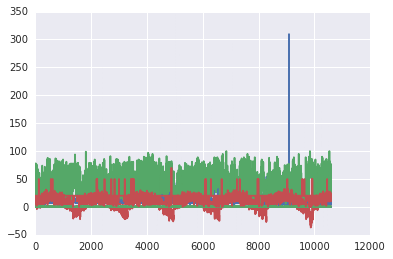

In [46]:
#sns.lmplot('isYellowDust', 'temp', data=df_gobi, fit_reg=False)
plt.plot(df_X)

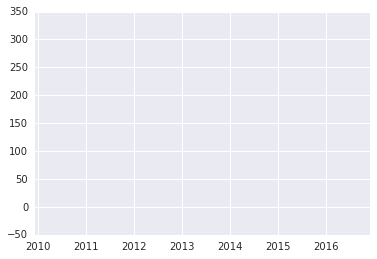

In [47]:
fig, ax = plt.subplots()
ax.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
ax.scatter(X[y==1, 0], X[y==1, 1], c='r', label='Class 1')
#ax.legend()
#ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], title="Iris dataset");

In [48]:

#df = pd.concat([df_X, df_y], axis=1)

In [49]:
X = df_X.as_matrix()

In [50]:
X.std(axis=0)

array([  6.74522751,  18.59851655,  11.04264213,   0.4975409 ,
         0.15380978,   0.11536278,   0.25688787,   0.15641168,
         0.07249213,   0.06356216,   0.19815911,   0.10709401,
         0.10880066,   0.07564126,   0.10535835,   0.16875666,
         0.13233395,   0.19169698,   0.17819194,   0.40480031,   3.22704386])

In [51]:
from sklearn import preprocessing


In [52]:
type(X)
X

array([[  7.2,  21. ,   6. , ...,   0. ,   1. ,  20. ],
       [ 14.4,  26. ,   5. , ...,   0. ,   1. ,  20. ],
       [  7.2,  27. ,   5. , ...,   0. ,   1. ,  20. ],
       ..., 
       [  7.2,  39. ,  18. , ...,   0. ,   0. ,  20. ],
       [ 14.4,  24. ,  22. , ...,   0. ,   0. ,  20. ],
       [ 18. ,  21. ,  24. , ...,   0. ,   0. ,  20. ]])

In [53]:
X = preprocessing.scale(X)

In [54]:
X.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

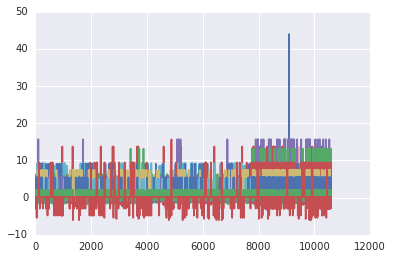

In [55]:
plt.plot(X)

In [56]:
# ラベル付きデータをトレーニングセットとテストセットに分割するためのモジュールを読み込む
from sklearn import cross_validation

In [57]:
# ラベル付きデータをトレーニングセット (X_train, y_train)とテストセット (X_test, y_test)に分割
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.2, random_state=42)

In [58]:
X_train.shape

(8480, 21)

In [59]:
y_train.shape

(8480,)

In [60]:
X_test.shape

(2120, 21)

In [61]:
y_test.shape

(2120,)

In [62]:
# まずは簡単なモデルで試してみよう

# === 線形モデル ===
# モジュールの読み込み
from sklearn import linear_model
#  モデル構築
model = linear_model.LogisticRegression()

# === サポートベクターマシン ===
# モジュールの読み込み
from sklearn import svm
#  モデル構築
model = svm.SVC()

# === K最近傍法 ===
# モジュールの読み込み
#from sklearn.neighbors import KNeighborsClassifier
#  モデル構築
#model = KNeighborsClassifier()

# === ランダムフォレスト ===
# モジュールの読み込み
from sklearn import ensemble
#  モデル構築
model = ensemble.RandomForestClassifier(n_estimators=5, max_depth=10)

# === 勾配ブースティング ===
# モジュールの読み込み
#from sklearn import ensemble
#  モデル構築
#model = ensemble.GradientBoostingClassifier()

In [63]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
#pd.DataFrame(y_train).to_csv("aa.csv")

In [65]:
# トレーニングセットに対する予測a
y_train_pred = model.predict(X_train)

In [66]:
# テストセットに対する予測
y_test_pred = model.predict(X_test)

In [67]:
# 評価基準モジュール（metrics）の読み込み
from sklearn import metrics

In [68]:
# トレーニングデータに対する予測精度を計算
print metrics.accuracy_score(y_train, y_train_pred)

0.984080188679


In [69]:
# テストデータに対する予測精度を計算
print metrics.accuracy_score(y_test, y_test_pred)

0.977358490566


In [70]:
# トレーニングデータに対する予測精度を計算
print model.score(X_train, y_train)

0.984080188679


In [71]:
# テストデータに対する予測精度を計算
print model.score(X_test, y_test)

0.977358490566


In [72]:
print u"トレーニングデータの予測精度： {0:.1f}%".format(model.score(X_train, y_train) * 100)
print u"テストデータの予測精度： {0:.1f}%".format(model.score(X_test, y_test) * 100)

トレーニングデータの予測精度： 98.4%
テストデータの予測精度： 97.7%


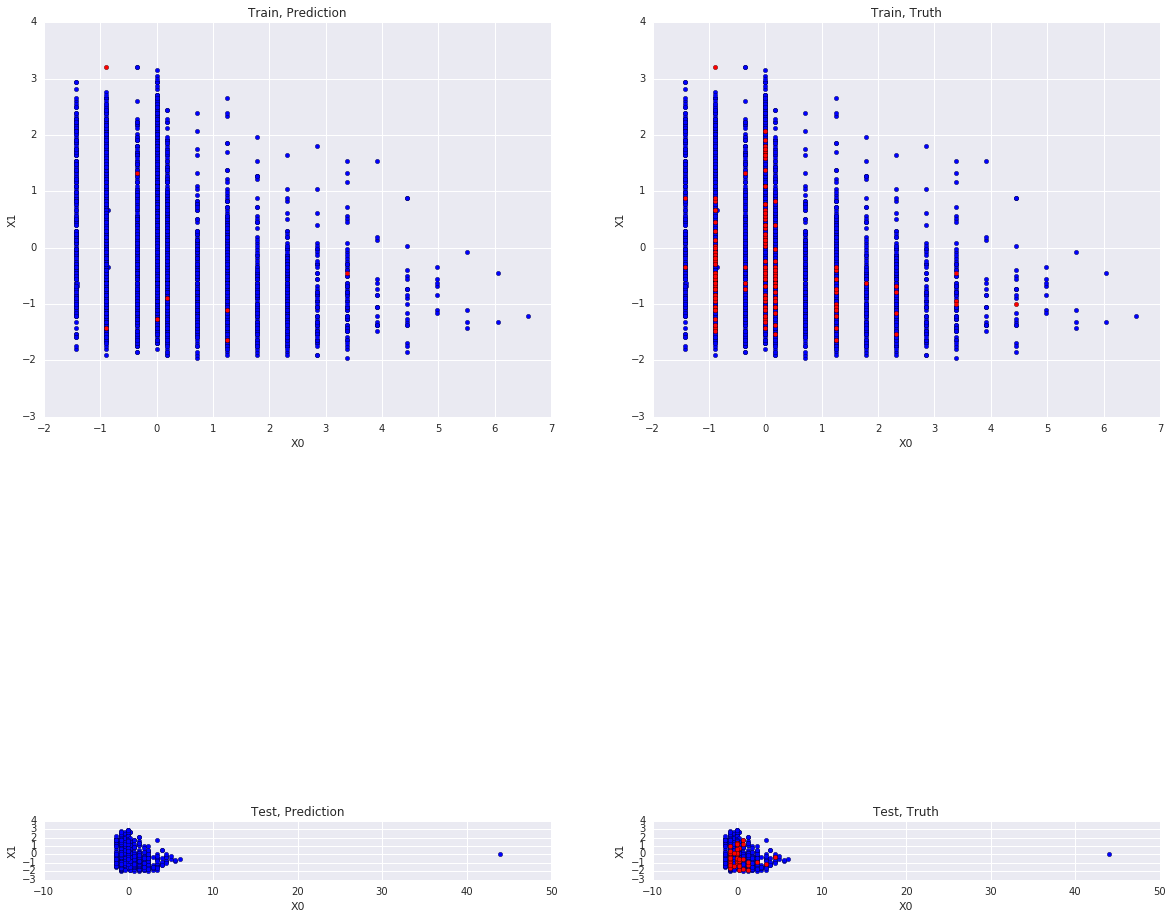

In [73]:
# 結果の可視化

fig, ax = plt.subplots(2, 2, figsize=(20, 20));

for ii in xrange(2):
    for jj in xrange(2):
        if ii == 0:
            XX = X_train
            yy = y_train_pred if jj == 0 else y_train
            title = "Train, Prediction" if jj == 0 else "Train, Truth"
        elif ii == 1:
            XX = X_test
            yy = y_test_pred if (jj == 0) else y_test
            title = "Test, Prediction" if jj == 0 else "Test, Truth"
            
        ax[ii, jj].scatter(XX[yy==0, 0], XX[yy==0, 1], c='b', label='Class 0')
        ax[ii, jj].scatter(XX[yy==1, 0], XX[yy==1, 1], c='r', label='Class 1')
        ax[ii, jj].set(xlabel='X0', ylabel='X1', title=title);
        ax[ii, jj].set_aspect('equal')
        
fig.subplots_adjust(wspace=0.2, hspace=0.3)

In [74]:
# 分類モデルの読み込み

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# K最近傍法
from sklearn.neighbors import KNeighborsClassifier
# サーポートベクターマシン
from sklearn.svm import SVC
# 決定木
from sklearn.tree import DecisionTreeClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
# 勾配ブースティング
from sklearn.ensemble import GradientBoostingClassifier

#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [75]:
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score

In [76]:
# KFoldを使って交差検証の舞台裏を理解
kfold = KFold(n=8, n_folds=4, random_state=42, shuffle=False)
for ii, jj in kfold:
    print ii, jj

[2 3 4 5 6 7] [0 1]
[0 1 4 5 6 7] [2 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5] [6 7]


In [77]:
# StratifiedKFoldを使って交差検証の舞台裏を理解
yy = np.array(([0] * 12 + [1] * 4))
skfold = StratifiedKFold(yy, n_folds=4)

for ii, jj in skfold:
    print ii, jj

[ 3  4  5  6  7  8  9 10 11 13 14 15] [ 0  1  2 12]
[ 0  1  2  6  7  8  9 10 11 12 14 15] [ 3  4  5 13]
[ 0  1  2  3  4  5  9 10 11 12 13 15] [ 6  7  8 14]
[ 0  1  2  3  4  5  6  7  8 12 13 14] [ 9 10 11 15]


In [78]:
# cross_val_scoreを使った交差検証

# モデルの構築
model = LogisticRegression()

# cross_val_scoreを使った交差検証。cvに自分で作ったcvオブジェクト（kfold）を渡しても良い。
result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

#kfold = KFold(n=X_train.shape[0], n_folds=5, random_state=42, shuffle=True)
#result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# 結果の表示
print("{0}\n{1:.3f} ({2:.3f})\n{3}".format(result, result.mean(), result.std(), model.__str__()))

[ 0.98291102  0.98291102  0.98290094  0.98348083  0.98348083]
0.983 (0.000)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [79]:
#　複数の分類器を用意
classifiers = [
    ('lr', LogisticRegression()), 
    ('knn', KNeighborsClassifier()),
    ('linear svc', SVC(kernel="linear")),
    ('rbf svc', SVC(gamma=2)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbc', GradientBoostingClassifier()),
    #('ab', AdaBoostClassifier()),    
    #('gnb', GaussianNB()),
    #('lda', LinearDiscriminantAnalysis()),
    #('qda', QuadraticDiscriminantAnalysis())
]

In [80]:
# それぞれのモデルに対して、交差検証（CV）をかける
import time
results = {}
exec_times = {}

for name, model in classifiers:
    tic = time.time()
    result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    exec_time = time.time() - tic
    exec_times[name] = exec_time
    results[name] = result
    
    print("{0:.3f} ({1:.3f}): time {2:.2f}s, {3}".format(result.mean(), result.std(), exec_time, name))

0.983 (0.000): time 0.20s, lr
0.983 (0.000): time 2.84s, knn
0.983 (0.000): time 0.53s, linear svc
0.983 (0.000): time 12.10s, rbf svc
0.967 (0.003): time 0.26s, dt
0.979 (0.001): time 0.68s, rf
0.983 (0.000): time 3.88s, gbc
